In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
from tqdm import tqdm_notebook as progressbar
import os
%matplotlib inline
import numpy as np
from PIL import Image, ImageDraw

In [3]:
df = pd.read_csv('final_dataframe.csv')
df.head(3)

,ranking,critic_score,title,number_of_critic_ratings,audience_score,audience_rating,review_url,review,poster_url,url
0,1,99,The Wizard of Oz (1939),110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...,bestofrt_posters/1_The_Wizard_of_Oz_(1939_film...
1,2,100,Citizen Kane (1941),75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/en/c/ce...,bestofrt_posters/2_Citizen_Kane.jpg
2,3,100,The Third Man (1949),77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/en/2/21...,bestofrt_posters/3_The_Third_Man.jpg


In [13]:
# Get image mask
for i in range(len(df)):
    try:
        movie_mask = np.array(Image.open(df.iloc[i].url))
    
    except:
        continue
#     print(i)

In [22]:
# Create folder if not exist
wc_folder = 'wordclouds'
if not os.path.exists(wc_folder):
    os.makedirs(wc_folder)

In [59]:
# Movie poster as Mask
index = 1
movie_mask = np.array(Image.open(df.iloc[index].url))
movie_mask = np.array(new_image)
review_text = df.iloc[index].review

In [73]:
original_img = Image.open(df.iloc[index].url)
original_size = original_img.size
original_size

margin = 200
new_size = (original_size[0] + margin*2, original_size[1] + margin*2)

new_image = Image.new('RGB', new_size)

draw = ImageDraw.Draw(original_img).rectangle( ((0,0), (original_size)), fill='white')

new_image.paste(draw, (int((new_size[0] - original_size[0])/2),
                               int((new_size[1] - original_size[1])/2)))



ValueError: cannot determine region size; use 4-item box

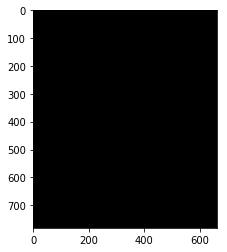

In [72]:
plt.imshow(new_image);

In [44]:
# Define Stopwords to be excluded
stopwords = set(wordcloud.STOPWORDS)

In [62]:
# Settings for WordCloud
wc = wordcloud.WordCloud(background_color='white', max_words=2000,
                        mask=movie_mask, stopwords=stopwords, margin=2)

# Generate WrodCloud over review text
wc.generate(review_text)

# Save it locally
wc.to_file(os.path.join(wc_folder, f'{df.iloc[index].title}.png'))

(-0.5, 661.5, 797.5, -0.5)

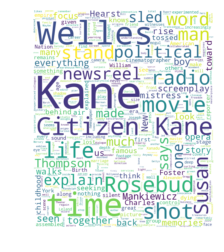

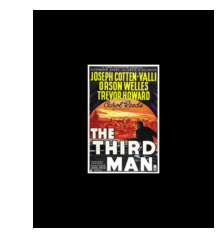

In [64]:
# plt.imshow(wc.recolor(color_func=wordcloud.ImageColorGenerator(movie_mask)), interpolation='bilinear')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(movie_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")